In [163]:
import warnings
warnings.filterwarnings("ignore")
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb


In [164]:
cm = 3
mN = 0.2
V2 = 1e-2    # used in reweighting the samples

In [165]:
# read the files, and calculate the corresponding yields

modes_dt = {
            1: {'mode': f'../data/features/sig_Maj_E-{cm}_m-{int(mN*1000)}_reco.root', 'yields': 1000}
           }

In [166]:
def load_train_test(modes_dt, size=0.5):
    np.random.seed(9)
    df_train = pd.DataFrame()
    df_test = pd.DataFrame()
    num_lt = []
    
    # loop over different modes
    for i, (k, v) in enumerate(modes_dt.items()):
        file = uproot.open(v['mode'])
        print("reading: ", v['mode'])
        df_i = pd.DataFrame(np.array(file['t']['features'].array()))
        df_i['target'] = k    # add the target label
        df_i['weight'] = v['yields']/len(df_i)
#         print(k, v)
        num_lt.append(len(df_i))

        # shuffle the index for training and testing sets
        idx = df_i.index.tolist()
        np.random.shuffle(idx)
        
        # cut according to the fraction
        cut = int(np.ceil(len(idx) * size))
        df_train_i = df_i.loc[idx[:cut]]
        df_test_i = df_i.loc[idx[cut:]]
        
        # Put to the global dataframs
        df_train = pd.concat([df_train, df_train_i])
        df_test = pd.concat([df_test, df_test_i])
    
    df_train.reset_index(drop=True, inplace=True)
    df_test.reset_index(drop=True, inplace=True)
    
    print('\ntrain size: {} ({:.2f}%); test size: {} ({:.2f}%)'.format(len(df_train), 100*len(df_train)/(len(df_train)+len(df_test)), len(df_test), 100*len(df_test)/(len(df_train)+len(df_test))))
    print('data points per mode: ',num_lt)
    return df_train, df_test

    

In [167]:
tr_te_size = 1
df_plot, _ = load_train_test(modes_dt, tr_te_size)


reading:  ../data/features/sig_Maj_E-3_m-200_reco.root

train size: 110 (100.00%); test size: 0 (0.00%)
data points per mode:  [110]


In [168]:
# df_plot_1 = df_plot
# df_plot_05 = df_plot
# df_plot_025 = df_plot
# df_plot_01 = df_plot
# df_plot_0 = df_plot

# df_plot_noWcut = df_plot
# df_plot_noWcut = df_plot
df_plot_10Wcut = df_plot
# df_plot_noptcut = df_plot
# df_plot_50ptcut = df_plot
# df_plot_nocut = df_plot

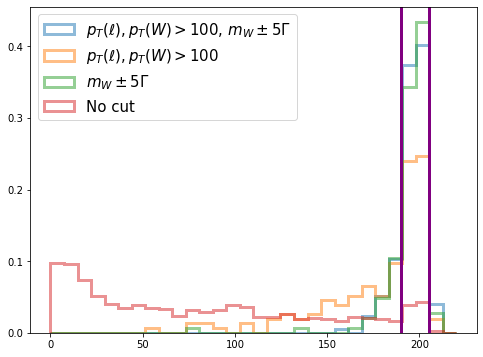

In [181]:

f = plt.figure(figsize=(8,6))

bins_=30
# range_ = [mN*(1-0.5)*1000, mN*(1+0.1)*1000]
range_ = [0, mN*(1+0.1)*1000]


plt.hist(df_plot_1[df_plot_1.target!=0]['mN'], weights=df_plot_1[df_plot_1.target!=0]['weight']/sum(df_plot_1[df_plot_1.target!=0]['weight']), bins=bins_, range=range_, histtype='step', lw=3, label=r'$p_T(\ell),p_T(W)>100$, $m_W\pm 5\Gamma$', alpha=0.5);
plt.hist(df_plot_noWcut[df_plot_noWcut.target!=0]['mN'], weights=df_plot_noWcut[df_plot_noWcut.target!=0]['weight']/sum(df_plot_noWcut[df_plot_noWcut.target!=0]['weight']), bins=bins_, range=range_, histtype='step', lw=3, label=r'$p_T(\ell),p_T(W)>100$', alpha=0.5);
plt.hist(df_plot_noptcut[df_plot_noptcut.target!=0]['mN'], weights=df_plot_noptcut[df_plot_noptcut.target!=0]['weight']/sum(df_plot_noptcut[df_plot_noptcut.target!=0]['weight']), bins=bins_, range=range_, histtype='step', lw=3, label=r'$m_W\pm 5\Gamma$', alpha=0.5);
plt.hist(df_plot_nocut[df_plot_nocut.target!=0]['mN'], weights=df_plot_nocut[df_plot_nocut.target!=0]['weight']/sum(df_plot_nocut[df_plot_nocut.target!=0]['weight']), bins=bins_, range=range_, histtype='step', lw=3, label=r'No cut', alpha=0.5);

partition_u = 0.025
partition_l = 0.05
plt.axvline(1000*mN*(1-partition_l), color='purple', lw=3)
plt.axvline(1000*mN*(1+partition_u), color='purple', lw=3)

plt.legend(fontsize=15)

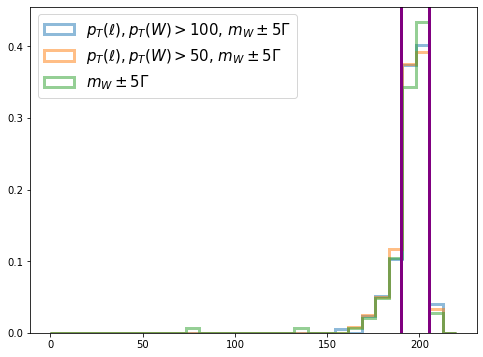

In [182]:

f = plt.figure(figsize=(8,6))

bins_=30
# range_ = [mN*(1-0.5)*1000, mN*(1+0.1)*1000]
range_ = [0, mN*(1+0.1)*1000]


plt.hist(df_plot_1[df_plot_1.target!=0]['mN'], weights=df_plot_1[df_plot_1.target!=0]['weight']/sum(df_plot_1[df_plot_1.target!=0]['weight']), bins=bins_, range=range_, histtype='step', lw=3, label=r'$p_T(\ell),p_T(W)>100$, $m_W\pm 5\Gamma$', alpha=0.5);
plt.hist(df_plot_50ptcut[df_plot_50ptcut.target!=0]['mN'], weights=df_plot_50ptcut[df_plot_50ptcut.target!=0]['weight']/sum(df_plot_50ptcut[df_plot_50ptcut.target!=0]['weight']), bins=bins_, range=range_, histtype='step', lw=3, label=r'$p_T(\ell),p_T(W)>50$, $m_W\pm 5\Gamma$', alpha=0.5);
plt.hist(df_plot_noptcut[df_plot_noptcut.target!=0]['mN'], weights=df_plot_noptcut[df_plot_noptcut.target!=0]['weight']/sum(df_plot_noptcut[df_plot_noptcut.target!=0]['weight']), bins=bins_, range=range_, histtype='step', lw=3, label=r'$m_W\pm 5\Gamma$', alpha=0.5);

partition_u = 0.025
partition_l = 0.05
plt.axvline(1000*mN*(1-partition_l), color='purple', lw=3)
plt.axvline(1000*mN*(1+partition_u), color='purple', lw=3)

plt.legend(fontsize=15)

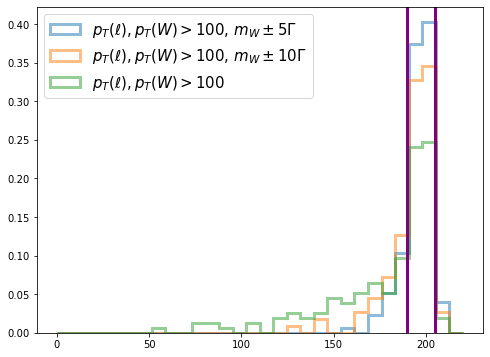

In [183]:

f = plt.figure(figsize=(8,6))

bins_=30
# range_ = [mN*(1-0.5)*1000, mN*(1+0.1)*1000]
range_ = [0, mN*(1+0.1)*1000]


plt.hist(df_plot_1[df_plot_1.target!=0]['mN'], weights=df_plot_1[df_plot_1.target!=0]['weight']/sum(df_plot_1[df_plot_1.target!=0]['weight']), bins=bins_, range=range_, histtype='step', lw=3, label=r'$p_T(\ell),p_T(W)>100$, $m_W\pm 5\Gamma$', alpha=0.5);
plt.hist(df_plot_10Wcut[df_plot_10Wcut.target!=0]['mN'], weights=df_plot_10Wcut[df_plot_10Wcut.target!=0]['weight']/sum(df_plot_10Wcut[df_plot_10Wcut.target!=0]['weight']), bins=bins_, range=range_, histtype='step', lw=3, label=r'$p_T(\ell),p_T(W)>100$, $m_W\pm 10\Gamma$', alpha=0.5);
plt.hist(df_plot_noWcut[df_plot_noWcut.target!=0]['mN'], weights=df_plot_noWcut[df_plot_noWcut.target!=0]['weight']/sum(df_plot_noWcut[df_plot_noWcut.target!=0]['weight']), bins=bins_, range=range_, histtype='step', lw=3, label=r'$p_T(\ell),p_T(W)>100$', alpha=0.5);

partition_u = 0.025
partition_l = 0.05
plt.axvline(1000*mN*(1-partition_l), color='purple', lw=3)
plt.axvline(1000*mN*(1+partition_u), color='purple', lw=3)

plt.legend(fontsize=15)